**DATA VISUALIZATION OF IPL 2013**

#Libraries used:

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#Read csv file using pandas:

In [ ]:
ipl_auction_df = pd.read_csv('IPL IMB381IPL2013.csv')

#information of data.

In [ ]:
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

# Display 10 columns of first 5 rows of the dataset:

In [ ]:
ipl_auction_df.iloc[0:5 , 0:10]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93


# Display the column names:

In [ ]:
x_feature=ipl_auction_df.columns
x_feature

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [ ]:
x_feature = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS',
'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

# one hot  encoding

In [ ]:
categorical_feature = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[x_feature], columns=categorical_feature, drop_first=True)
ipl_auction_encoded_df

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,...,False,False,True,False,False,False,False,False,False,False
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,...,False,False,False,False,False,False,False,True,False,False
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,...,False,False,False,False,False,False,False,True,False,False
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,...,False,False,False,False,False,False,False,True,False,False
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,0.00,0,0.0,49,16,9.80,125.64,...,False,False,False,False,False,False,True,False,False,False
126,6398,7,6814,75.78,3,86.6,3,3,3.00,42.85,...,False,True,False,False,False,False,True,False,False,True
127,1775,9,8051,87.58,109,44.3,1237,66,26.32,131.88,...,False,False,False,False,False,False,True,False,False,True
128,1114,288,790,73.55,278,35.4,99,23,9.90,91.67,...,False,False,False,False,False,False,False,True,False,False


# Restore it back to x_feature.

In [ ]:
x_feature= ipl_auction_encoded_df.columns
x_feature

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

# Display data types of the dataset

In [ ]:
x= sm.add_constant(ipl_auction_encoded_df)
y= ipl_auction_df['SOLD PRICE']
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.8,random_state=42)

 # Display first 5 entries:

In [ ]:
ipl_model_1 = sm.OLS(train_y, train_x.astype(float)).fit()
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2024-08-19 07:48        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7997  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1773   86671.0156
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4196  752467.3803
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5171 1147625.0136
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6303  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9281  540068.7522
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6564
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7527  368875.0587
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9304  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6298  654891.6711
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1845  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0279  354416.7719
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0773  410167.8717
----------------------------------------------------------------

# Display last 5 entries:

In [ ]:
pred_y = np.power(ipl_model_1.predict(test_x[train_x.columns]), 2)
from sklearn import metrics
np.round(metrics.r2_score(pred_y, test_y), 2)

-0.88

# Display a specific column of first 5 entries:

In [ ]:
ipl_auction_df['PLAYER NAME'][0:5]

,PLAYER NAME
0,"Abdulla, YA"
1,Abdur Razzak
2,"Agarkar, AB"
3,"Ashwin, R"
4,"Badrinath, S"


# Display 2 different columns of first 5 entries:

In [ ]:
ipl_auction_df[['PLAYER NAME','COUNTRY']][0:5]

,PLAYER NAME,COUNTRY
0,"Abdulla, YA",SA
1,Abdur Razzak,BAN
2,"Agarkar, AB",IND
3,"Ashwin, R",IND
4,"Badrinath, S",IND


# Display specific columns of specific entries:

In [ ]:
ipl_auction_df.iloc[4:9, 1:4]

,PLAYER NAME,AGE,COUNTRY
4,"Badrinath, S",2,IND
5,"Bailey, GJ",2,AUS
6,"Balaji, L",2,IND
7,"Bollinger, DE",2,AUS
8,"Botha, J",2,SA


# Count number of entries for a specific column head followed by normalization:

In [ ]:
ipl_auction_df.COUNTRY.value_counts()

,count
COUNTRY,
IND,53
AUS,22
SA,16
SL,12
PAK,9
NZ,7
WI,6
ENG,3
BAN,1


In [ ]:
ipl_auction_df.COUNTRY.value_counts(normalize=True)*100

,proportion
COUNTRY,
IND,40.769231
AUS,16.923077
SA,12.307692
SL,9.230769
PAK,6.923077
NZ,5.384615
WI,4.615385
ENG,2.307692
BAN,0.769231


# Sorting of data based on a parameter:

In [ ]:
ipl_auction_df[['PLAYER NAME', 'SOLD PRICE']].sort_values('SOLD PRICE', ascending=True)[0:5]

,PLAYER NAME,SOLD PRICE
73,"Noffke, AA",20000
46,Kamran Khan,24000
0,"Abdulla, YA",50000
1,Abdur Razzak,50000
118,Van der Merwe,50000


# Grouping of data based on average value of a parameter and display:

In [ ]:
ipl_auction_df.groupby('AGE')['SOLD PRICE'].mean().reset_index()

,AGE,SOLD PRICE
0,1,720250.000000
1,2,484534.883721
2,3,520178.571429


## Visualization

In [ ]:
soldprice_by_age = ipl_auction_df.groupby('AGE')['SOLD PRICE'].mean().reset_index()

# Bar Chart

<Axes: xlabel='AGE', ylabel='SOLD PRICE'>

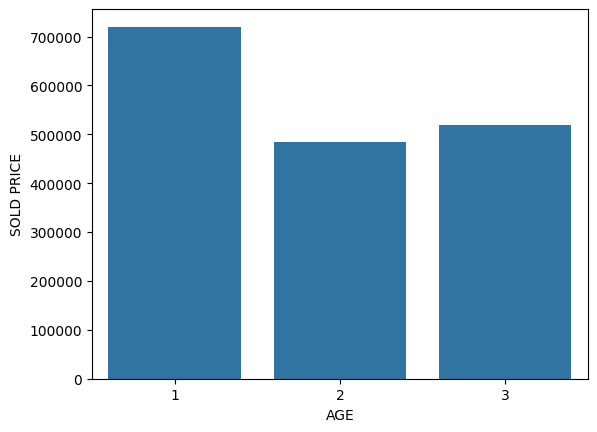

In [ ]:
sn.barplot(x='AGE', y='SOLD PRICE', data=soldprice_by_age)

In [ ]:
 soldprice_by_age_role = ipl_auction_df.groupby(['AGE','PLAYING ROLE'])['SOLD PRICE'].mean().reset_index()

In [ ]:
soldprice_comparison = soldprice_by_age_role.merge (soldprice_by_age, on='AGE', how='outer')

In [ ]:
soldprice_comparison.rename(columns={'SOLD PRICE_x':'SOLD_PRICE_AGE_ROLE','SOLD PRICE_y':'SOLD_PRICE_AGE'}, inplace=True)

# Bar chart after grouping:

<Axes: xlabel='AGE', ylabel='SOLD_PRICE_AGE_ROLE'>

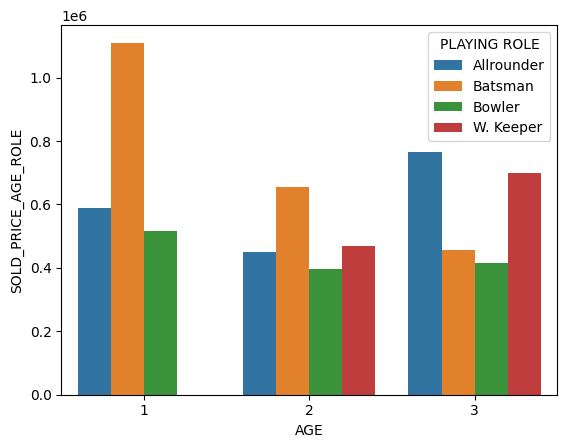

In [ ]:
sn.barplot (x='AGE', y='SOLD_PRICE_AGE_ROLE', hue='PLAYING ROLE', data=soldprice_comparison)

# Histogram

(array([27., 32., 21., 20., 14.,  7.,  0.,  1.,  4.,  4.]),
 array([  20000.,  198000.,  376000.,  554000.,  732000.,  910000.,
        1088000., 1266000., 1444000., 1622000., 1800000.]),
 <BarContainer object of 10 artists>)

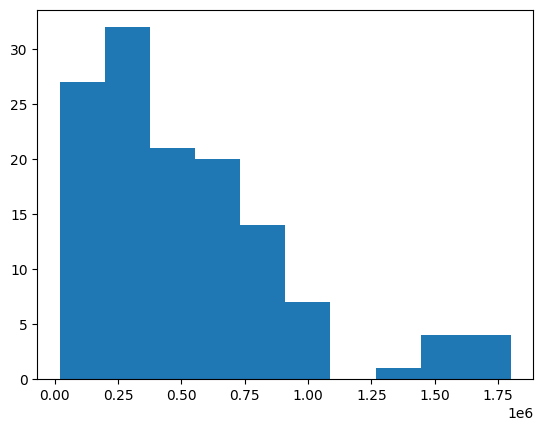

In [ ]:
plt.hist(ipl_auction_df['SOLD PRICE'])

# Histogram with 20 bins

(array([16., 11., 16., 16.,  9., 12.,  5., 15.,  8.,  6.,  6.,  1.,  0.,
         0.,  1.,  0.,  1.,  3.,  0.,  4.]),
 array([  20000.,  109000.,  198000.,  287000.,  376000.,  465000.,
         554000.,  643000.,  732000.,  821000.,  910000.,  999000.,
        1088000., 1177000., 1266000., 1355000., 1444000., 1533000.,
        1622000., 1711000., 1800000.]),
 <BarContainer object of 20 artists>)

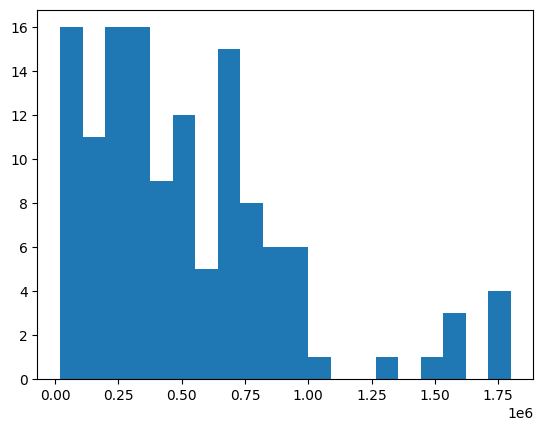

In [ ]:
plt.hist(ipl_auction_df['SOLD PRICE'],bins=20)

<ipython-input-43-a0ccd5865890>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(ipl_auction_df['SOLD PRICE'])


<Axes: xlabel='SOLD PRICE', ylabel='Density'>

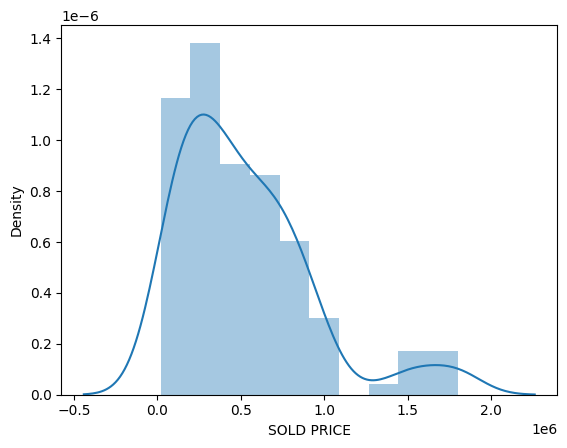

In [ ]:
sn.distplot(ipl_auction_df['SOLD PRICE'])

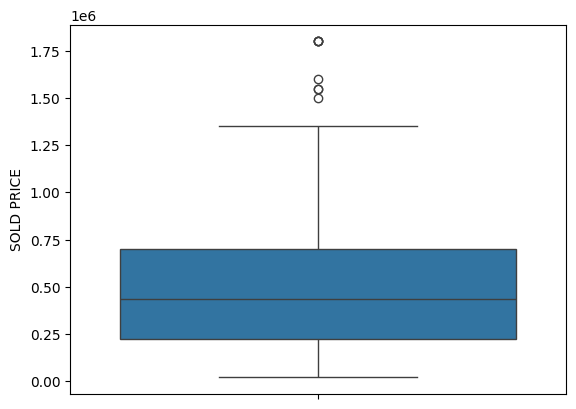

In [ ]:
box = sn.boxplot(ipl_auction_df['SOLD PRICE'])

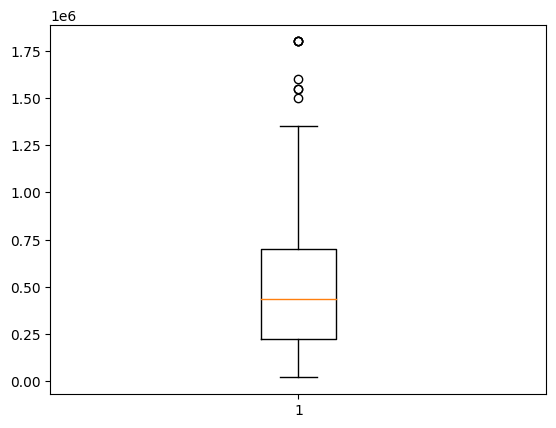

In [ ]:

box= plt.boxplot(ipl_auction_df['SOLD PRICE'])

In [ ]:
caps = box.lines[0:2]
[item.get_ydata()[0] for item in caps]

[225000.0, 700000.0]

In [ ]:
[item.get_ydata()[0] for item in box['whiskers']]

[225000.0, 700000.0]

In [ ]:
[item.get_ydata() [0] for item in box['medians']]

[437500.0]

In [ ]:
ipl_auction_df[ipl_auction_df['SOLD PRICE'] > 1350000.0]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,...,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
15,16,"Dhoni, MS",2,IND,CSK,...,0.00,0.00,2008,400000,1500000
23,24,"Flintoff, A",2,ENG,CSK,...,9.55,33.00,2009,950000,1550000
50,51,"Kohli, V",1,IND,RCB,...,8.84,58.50,2011,150000,1800000
83,84,"Pietersen, KP",2,ENG,RCB+,...,7.41,24.86,2009,1350000,1550000
93,94,"Sehwag, V",2,IND,DD,...,10.56,21.67,2011,400000,1800000
111,112,"Tendulkar, SR",3,IND,MI,...,9.67,0.00,2011,400000,1800000
113,114,"Tiwary, SS",1,IND,MI+,...,0.00,0.00,2011,100000,1600000
127,128,Yuvraj Singh,2,IND,KXIP+,...,7.02,21.13,2011,400000,1800000


# Scatter plot using matplotlib:

In [ ]:
ipl_batsman_df = ipl_auction_df[ipl_auction_df['PLAYING ROLE'] == 'Batsman']

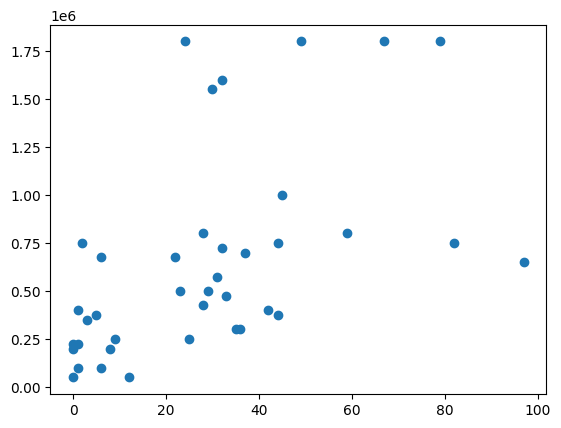

In [ ]:
plt.scatter(x=ipl_batsman_df.SIXERS, y=ipl_batsman_df['SOLD PRICE'])

# Scatter plot using seaborn:

<Axes: xlabel='SIXERS', ylabel='SOLD PRICE'>

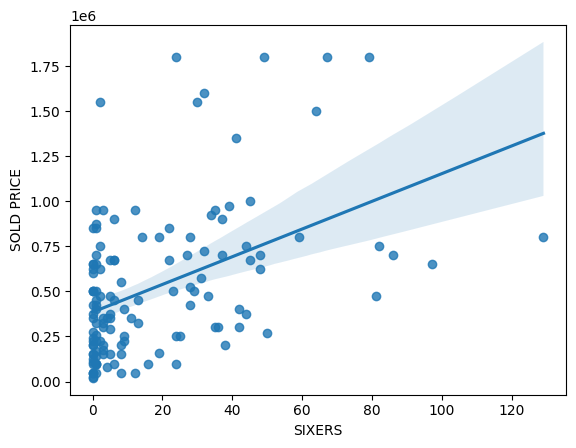

In [ ]:
sn.regplot(x='SIXERS', y='SOLD PRICE', data=ipl_auction_df)

# SR-B AVE SIXERS SOLD PRICE:

In [ ]:
influential_features = ['SR-B' ,'AVE', 'SIXERS', 'SOLD PRICE']
ipl_auction_df[influential_features].corr()

,SR-B,AVE,SIXERS,SOLD PRICE
SR-B,1.000000,0.583579,0.425394,0.184278
AVE,0.583579,1.000000,0.705365,0.396519
SIXERS,0.425394,0.705365,1.000000,0.450609
SOLD PRICE,0.184278,0.396519,0.450609,1.000000


# Heatmap:

<Axes: >

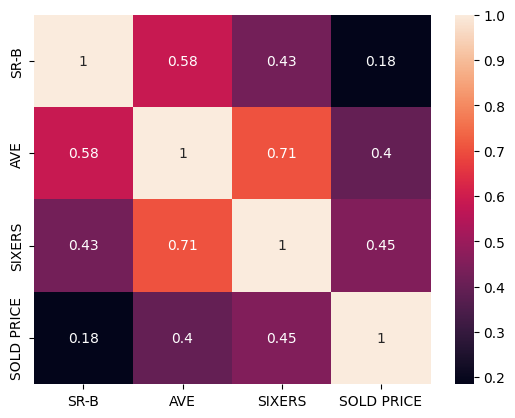

In [ ]:
sn.heatmap(ipl_auction_df[influential_features].corr(), annot=True)